# HW 1

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


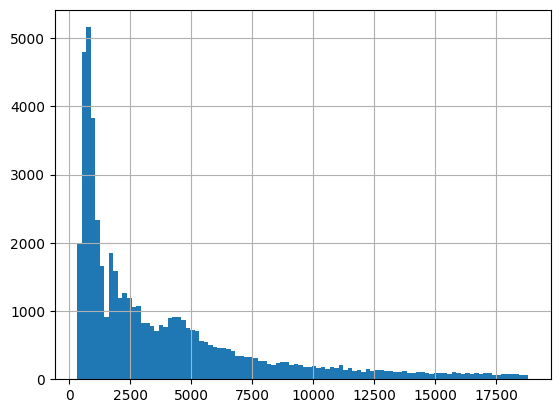

In [4]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid()

# Подготовка данных

In [5]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [6]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [7]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [8]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [11]:
reg = LinearRegression().fit(X_train, y_train)

In [12]:
y_pred = reg.predict(X_test)

In [13]:
score = r2_score(y_pred, y_test)

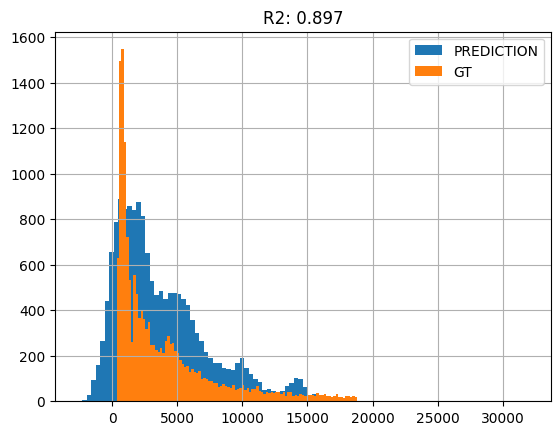

In [ ]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()

In [21]:
np.mean(y_test)

np.float64(3892.1881102459524)

In [19]:
mae_score = mean_absolute_error(y_pred, y_test)
mae_score

np.float64(810.8358895349686)

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [ ]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000, verbose=False):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
            verbose (bool): Если True, выводит информацию о процессе обучения
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.verbose = verbose

    def compute_loss(self, y_true, y_pred):
        """
        Вычисление функции потерь MSE
        Параметры:
            y_true (np.ndarray): Вектор таргета длины n_samples
            y_pred (np.ndarray): Вектор предсказаний длины n_samples
        """

        n_samples = y_true.shape[0]

        return (1 / n_samples) * np.sum((y_pred - y_true) ** 2)

    def compute_gradients(self, X, y_true, y_pred):
        """
        Вычисление градиентов функции потерь по весам и смещению
        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
            y_pred (np.ndarray): Вектор предсказаний длины n_samples
        """
        n_samples = y_true.shape[0]
        
        dw = (2 / n_samples) * np.dot(X.T, (y_pred - y_true))
        db = (2 / n_samples) * np.sum(y_pred - y_true)
        
        return dw, db

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for i in range(self.n_iter):    
            y_pred = np.dot(X, self.weights) + self.bias
            
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            dw, db = self.compute_gradients(X, y, y_pred)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            if self.verbose and i % 100 == 0:
                print(f'Итерация {i}, Ошибка: {loss:.4f}')

        return self


    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return np.dot(X, self.weights) + self.bias

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return {'weights': self.weights, 'bias': self.bias, 'loss_history': self.loss_history}


In [22]:
X_train.shape, y_train.shape

((37758, 9), (37758, 1))

In [26]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [42]:
my_model = LinearRegressorGD(learning_rate=0.25, n_iter=15000, verbose=True)
my_model.fit(X_train, y_train)

Итерация 0, Ошибка: 31527543.6139
Итерация 100, Ошибка: 4996222.3145
Итерация 200, Ошибка: 2806754.6773
Итерация 300, Ошибка: 2167364.4298
Итерация 400, Ошибка: 1972425.6287
Итерация 500, Ошибка: 1905969.2448
Итерация 600, Ошибка: 1877200.0847
Итерация 700, Ошибка: 1859947.1284
Итерация 800, Ошибка: 1846602.2477
Итерация 900, Ошибка: 1834901.0468
Итерация 1000, Ошибка: 1824126.8215
Итерация 1100, Ошибка: 1814018.6703
Итерация 1200, Ошибка: 1804455.9727
Итерация 1300, Ошибка: 1795366.0506
Итерация 1400, Ошибка: 1786696.2178
Итерация 1500, Ошибка: 1778404.5887
Итерация 1600, Ошибка: 1770456.4984
Итерация 1700, Ошибка: 1762822.7172
Итерация 1800, Ошибка: 1755478.3270
Итерация 1900, Ошибка: 1748401.9066
Итерация 2000, Ошибка: 1741574.8994
Итерация 2100, Ошибка: 1734981.1114
Итерация 2200, Ошибка: 1728606.3062
Итерация 2300, Ошибка: 1722437.8778
Итерация 2400, Ошибка: 1716464.5849
Итерация 2500, Ошибка: 1710676.3354
Итерация 2600, Ошибка: 1705064.0099
Итерация 2700, Ошибка: 1699619.3175
Ите

In [43]:
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name}:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R2: {r2_score(y_true, y_pred):.4f}")

In [44]:
y_pred_my = my_model.predict(X_test)
print_metrics(y_test, y_pred_my, "LinRegGD")
print()
print_metrics(y_test, y_pred, "Sklearn LinReg")


LinRegGD:
MAE: 833.39
MSE: 1497357.01
RMSE: 1223.67
R2: 0.9058

Sklearn LinReg:
MAE: 810.84
MSE: 1477039.71
RMSE: 1215.34
R2: 0.9071


# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [ ]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
            weights (list): Список весов для каждого слоя
            biases (list): Список смещений для каждого слоя
            loss_history (list): История значений функции потерь на каждой итерации
            activations (list): Список активаций каждого слоя
            z_values (list): Список z = XW + b до активации каждого слоя
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = []
        self.biases = []
        self.loss_history = []
        self.activations = []
        self.z_values = []

    def initialize_weights(self, n_features):
        self.weights = []
        self.biases = []

        layer_sizes = [n_features] + list(self.hidden_layer_sizes) + [1]
        
        for i in range(len(layer_sizes)-1):
            W = np.random.uniform(-0.1, 0.1, (layer_sizes[i], layer_sizes[i+1]))
            b = np.zeros(layer_sizes[i+1])
            
            self.weights.append(W)
            self.biases.append(b)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        
        self.activations = [X]
        self.z_values = []

        for i in range(len(self.weights)-1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            a = self.sigmoid(z)
            self.z_values.append(z)
            self.activations.append(a)
        
        z_out = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        self.z_values.append(z_out)
        self.activations.append(z_out)
    
        return self.activations[-1]

    def backward(self, X, y):

        n_samples = X.shape[0]
        gradients_w = []
        gradients_b = []

        error = self.activations[-1] - y.reshape(-1, 1)
        delta = (2 / n_samples) * error 

        for i in range(len(self.weights) - 1, 0, -1):
            grad_w = np.dot(self.activations[i].T, delta)
            grad_b = np.sum(delta, axis=0)
            
            gradients_w.append(grad_w)
            gradients_b.append(grad_b)
            
            delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(self.z_values[i - 1])

        grad_w = np.dot(X.T, delta)
        grad_b = np.sum(delta, axis=0)
        gradients_w.append(grad_w)
        gradients_b.append(grad_b)
        gradients_w.reverse()
        gradients_b.reverse()

        return gradients_w, gradients_b

    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        self.initialize_weights(X.shape[1])
    
        for epoch in range(self.n_iter):
            y_pred = self.forward(X)
            
            grad_w, grad_b = self.backward(X, y)
            
            for i in range(len(self.weights)):
                self.weights[i] -= self.learning_rate * grad_w[i]
                self.biases[i] -= self.learning_rate * grad_b[i]
            
            loss = np.mean((y_pred - y.reshape(-1, 1))**2)
            self.loss_history.append(loss)
            
            if epoch % 100 == 0:
                print(f"Эпоха {epoch}, Ошибка: {loss:.4f}")
        
        return self

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        a = X
        for i in range(len(self.weights) - 1):
            z = np.dot(a, self.weights[i]) + self.biases[i]
            a = self.sigmoid(z)
        z_out = np.dot(a, self.weights[-1]) + self.biases[-1]

        return z_out.flatten()


In [57]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, ), learning_rate=0.05, n_iter=5000)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print_metrics(y_test, y_pred_mlp, "MLPRegressor")

Эпоха 0, Ошибка: 31526980.3713


/var/folders/2r/gbs4t6vx0g9frh8t4w63tzfm0000gn/T/ipykernel_42263/1853030255.py:46: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Эпоха 100, Ошибка: 15923427.4200
Эпоха 200, Ошибка: 15923427.0625
Эпоха 300, Ошибка: 15923426.8701
Эпоха 400, Ошибка: 15923426.7295
Эпоха 500, Ошибка: 15923426.5812
Эпоха 600, Ошибка: 15923426.2121
Эпоха 700, Ошибка: 15923426.2711
Эпоха 800, Ошибка: 15923426.4933
Эпоха 900, Ошибка: 15923426.6342
Эпоха 1000, Ошибка: 15923426.6035
Эпоха 1100, Ошибка: 15923426.5710
Эпоха 1200, Ошибка: 15923426.5309
Эпоха 1300, Ошибка: 15923426.4650
Эпоха 1400, Ошибка: 15923426.1937
Эпоха 1500, Ошибка: 15923426.3534
Эпоха 1600, Ошибка: 15923426.4565
Эпоха 1700, Ошибка: 15923504.2594
Эпоха 1800, Ошибка: 15923426.5548
Эпоха 1900, Ошибка: 15923426.5406
Эпоха 2000, Ошибка: 15923426.5232
Эпоха 2100, Ошибка: 15923426.4982
Эпоха 2200, Ошибка: 15923426.4530
Эпоха 2300, Ошибка: 15923426.3071
Эпоха 2400, Ошибка: 15923426.2597
Эпоха 2500, Ошибка: 15923426.5562
Эпоха 2600, Ошибка: 15923426.5520
Эпоха 2700, Ошибка: 15923426.5479
Эпоха 2800, Ошибка: 15923426.5439
Эпоха 2900, Ошибка: 15923426.5398
Эпоха 3000, Ошибка: 159

Думаю, здесь, как минимум, не хватает улучшенной инициализации параметров, как и стабилизации сигмоиды (?)... плюс подбор параметров.. ибо градиенты явно залипли

Проверим способность к сходимости в целом..

In [59]:
X = np.random.randn(600, 3)

# y = 2 * x1 - x2 + 0.5 * x3 + шум
noise = 0.1 * np.random.randn(600)
y = 2 * X[:, 0] - X[:, 1] + 0.5 * X[:, 2] + noise

mlp = MLPRegressor(hidden_layer_sizes=(16,), learning_rate=0.01, n_iter=2000)
mlp.fit(X, y)

print("Ошибка в начале:", mlp.loss_history[0])
print("Ошибка в конце:", mlp.loss_history[-1])

y_pred = mlp.predict(X)

mse = np.mean((y_pred - y)**2)
var_y = np.var(y)
r2 = 1 - mse / var_y

print("R2:", r2)


Эпоха 0, Ошибка: 5.6163
Эпоха 100, Ошибка: 5.3285
Эпоха 200, Ошибка: 3.7186
Эпоха 300, Ошибка: 1.0032
Эпоха 400, Ошибка: 0.1852
Эпоха 500, Ошибка: 0.1055
Эпоха 600, Ошибка: 0.0963
Эпоха 700, Ошибка: 0.0917
Эпоха 800, Ошибка: 0.0875
Эпоха 900, Ошибка: 0.0837
Эпоха 1000, Ошибка: 0.0802
Эпоха 1100, Ошибка: 0.0769
Эпоха 1200, Ошибка: 0.0738
Эпоха 1300, Ошибка: 0.0710
Эпоха 1400, Ошибка: 0.0684
Эпоха 1500, Ошибка: 0.0659
Эпоха 1600, Ошибка: 0.0636
Эпоха 1700, Ошибка: 0.0615
Эпоха 1800, Ошибка: 0.0595
Эпоха 1900, Ошибка: 0.0577
Ошибка в начале: 5.616255980102455
Ошибка в конце: 0.05595672228243073
R2: 0.9899920976477908
